   # openCV color detection
   
   ## Images used in the exampes


fubar.jpg
<img src="./images/fubar.jpg" height="25%" width="25%" alt="fubar power racing" />

colortest.png
<img src="./images/colortest.png" height="25%" width="25%" alt="color test image" />
<!-- ![fubar](./images/fubar.jpg) -->

### In this section we'll try manipulating the image to find the largest green colors

Functions we need:
* blur
* filter by color
* create a mask
* find the biggest contour
* bounding and drawing around the object

In [1]:
#set up the environment
%matplotlib inline 
import cv2
import numpy as np
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt

print(cv2.__version__)


SyntaxError: invalid syntax (<ipython-input-1-ae4a27eaddcb>, line 10)

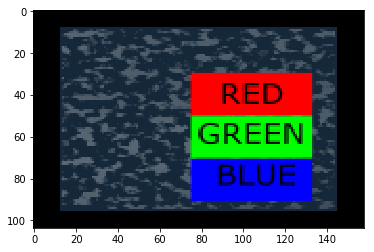

In [2]:
#load the test image and show it
img = cv2.imread("./images/colortest.png")
imgColorFix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgColorFix)


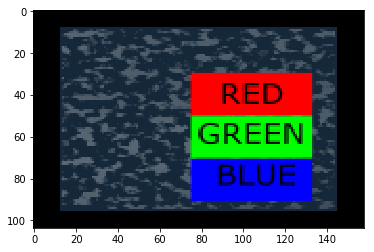

In [3]:
#eliminate copy and past for show
def show(image):
    plt.imshow(image)
    
show(imgColorFix)

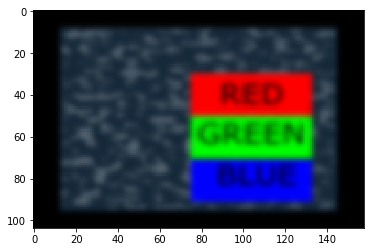

In [4]:
#blur the image
image_blur = cv2.GaussianBlur(imgColorFix, (7,7),0)
plt.imshow(image_blur);


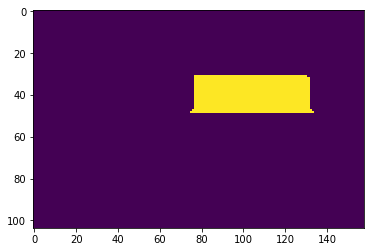

In [5]:
#filter by color
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
show(image_red1)



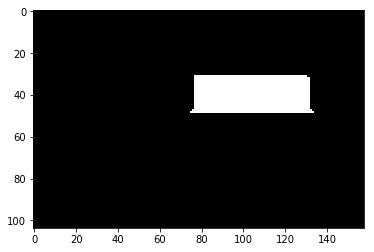

In [6]:
#show image mask
plt.imshow(image_red1,cmap="gray")

In this case the color is easily identifable and can guaratee insides is green. But a real life picture will have many color values, hues, and saturation. So let's checkout out the Fubar Car. We'll do the same things as before.

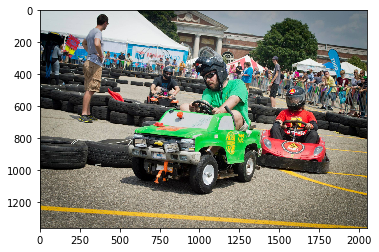

In [7]:
#Now let's look at the Fubar Car photo
img = cv2.imread("./images/fubar.jpg")
imgColorFix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgColorFix)

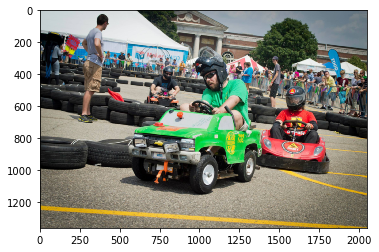

In [8]:
image_blur = cv2.GaussianBlur(imgColorFix, (7,7),0)
plt.imshow(image_blur);


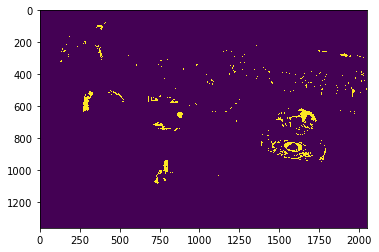

In [9]:
#filter by color
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
show(image_red1)


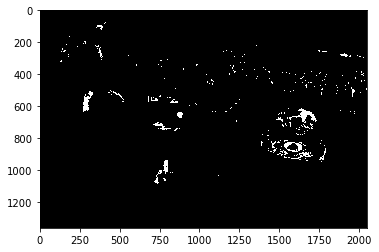

In [10]:
#show image mask
plt.imshow(image_red1,cmap="gray")

So in this case the red shows and you can see the pursuit vehicle but many other items show as read too. So let's examine the range of each color.

In [11]:
#Here's a way to see the histogram of the image for each color value.
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)

        plt.show()

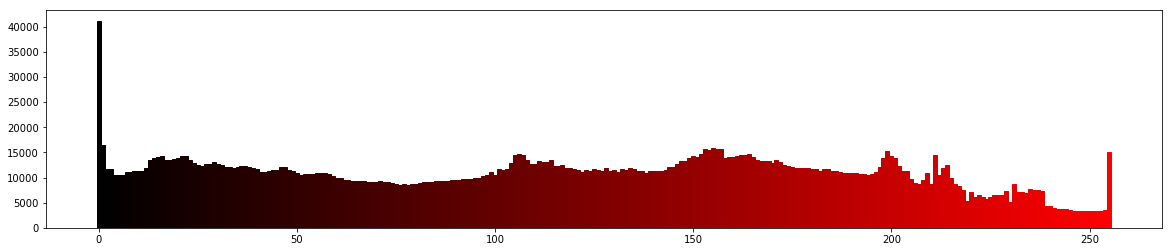

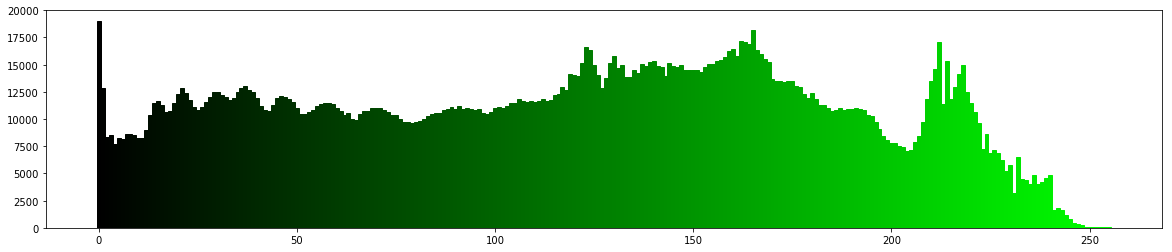

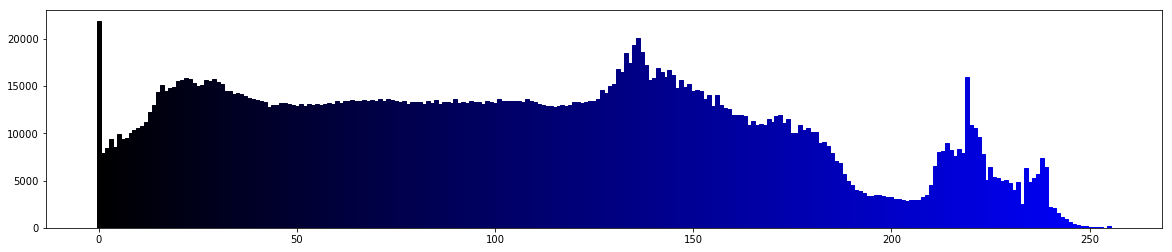

In [12]:
show_rgb_hist(imgColorFix)

This gives a good idea of what's happening with each color. But let's look at the same image from the point of view of hsv.

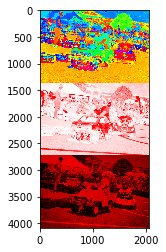

In [ ]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(imgColorFix, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    color = hsv.copy()
    if i != 0: color[:,:,0] = 0
    if i != 1: color[:,:,1] = 255
    if i != 2: color[:,:,2] = 255
    images.append(color)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)


In [ ]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')

show_hsv_hist(hsv)


In [ ]:
# Blur image slightly
image_blur = cv2.GaussianBlur(imgColorFix, (7, 7), 0)
show(image_blur)


In [ ]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)


In [ ]:
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')


In [ ]:
show_mask(image_red1)

In [ ]:
# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red2)


In [ ]:
image_red = image_red1 + image_red2
show_mask(image_red)


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

In [ ]:
def find_biggest_contour(image):

    # Copy to prevent modification
    image = image.copy()
    image, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    biggest_contour = max(contours, key=cv2.contourArea)

    # Draw just largest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(mask)


In [ ]:
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

overlay_mask(mask, imgColorFix)


In [ ]:
# Centre of mass
moments = cv2.moments(mask)
centre_of_mass = (
    int(moments['m10'] / moments['m00']),
    int(moments['m01'] / moments['m00'])
)
image_with_com = imgColorFix.copy()
#opencv 3.2 uses cv2.LINE_AA 
cv2.circle(image_with_com, centre_of_mass, 25, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)


In [ ]:
# Bounding ellipse
image_with_ellipse = imgColorFix.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0, 255, 0), 5)
show(image_with_ellipse)
